In [10]:

from matplotlib import pyplot
import os

def find_files(fileptr, search_path):
    
    result = []
    # Wlaking top-down from the root
    for root, dir, files in os.walk(search_path):
        for f_name in files:
            if fileptr in f_name:
                result.append(f_name)
        
    return result

nExp = 29
dir_exp = './OutPlots/'
file_name = '{}-Desc_Beam'.format(nExp)

all_files = find_files(file_name, dir_exp)
enumerate_files = list(enumerate(all_files, start=1))
enumerate_files.append((0,"Exit"))


In [11]:
import numpy as np
from pandas import DataFrame 

def get_instance(file_path):
    index_apertures = 0
    intensity = None
    ID_BEAM = None
    intensity_matrix = []
    current_aperture = []
    instance_content = {
                        'Beam': None,
                        'Intensity': None, 
                        'Apertures': {},
                        'Intensities': {}
                        }

    complete_file = open (file_path, 'r')
    
    on_intensity = True
    for line in complete_file.readlines():
    
        line = line.strip().split(',')
        if len(line) < 2:
            continue
        
        if(line[0]) == 'Aperture':
            on_intensity = False

        if on_intensity:

            if line[0] == 'Beam':
                ID_BEAM = int(line[1])
                instance_content['Beam'] = ID_BEAM
            else:
                line.pop()
                row = np.array([float(x) for x in line])
                intensity_matrix.append(row)
        else:

            if line[0] == 'Aperture':

                if index_apertures != 0:
                    current_aperture = DataFrame(np.matrix(current_aperture))
                    instance_content['Apertures'][index_apertures-1] = current_aperture
                    instance_content['Intensities'][index_apertures-1] = intensity
                    current_aperture = []

                intensity = float(line[1])
                index_apertures+=1    

            else:
                line.pop()
                row = np.array([float(x) for x in line])
                current_aperture.append(row)

    intensity_frame = DataFrame(np.matrix(intensity_matrix))
    current_aperture = DataFrame(np.matrix(current_aperture))
    instance_content['Intensity'] = intensity_frame
    instance_content['Apertures'][index_apertures-1] = current_aperture
    instance_content['Intensities'][index_apertures-1] = intensity

    print(instance_content['Intensity'])    
    return instance_content



AVAILABLES FILES:
1 - 29-Desc_Beam280.txt
2 - 29-Desc_Beam70.txt
3 - 29-Desc_Beam210.txt
4 - 29-Desc_Beam140.txt
5 - 29-Desc_Beam0.txt
0 - Exit
     0      1       2       3       4       5       6       7       8    9   \
0  -1.0 -1.000  -1.000  -1.000  -1.000  -1.000  -1.000  -1.000  -1.000 -1.0   
1  -1.0 -1.000  -1.000  -1.000  -1.000  -1.000  19.415   0.000   0.000 -1.0   
2  -1.0 -1.000  -1.000  -1.000   0.000  22.620  22.620  11.387   0.000  0.0   
3  -1.0  0.000   1.357   1.357   1.357  22.620  11.387  11.387   3.205  0.0   
4  -1.0  1.357   1.357   9.539   9.539  18.058  18.058  18.058   8.182  0.0   
5  -1.0  0.000   3.205   3.205  21.263  22.620  14.438  14.438  14.438  0.0   
6  -1.0  9.876   9.876  14.438  22.620  19.415  18.058  18.058   9.876  0.0   
7  -1.0  0.000  11.387  12.744  12.744  14.438  14.438   9.876   9.876  0.0   
8  -1.0 -1.000   0.000   9.876  22.620  22.620  13.081   9.876   9.876  0.0   
9  -1.0 -1.000  -1.000  -1.000   9.539  12.744  22.620  14.438   0

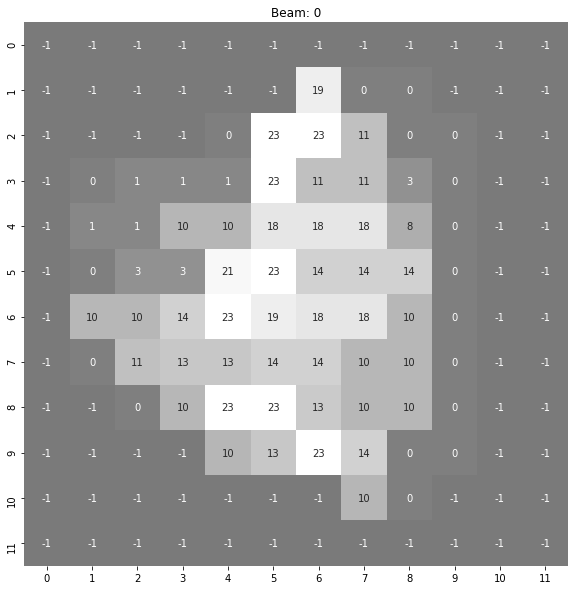

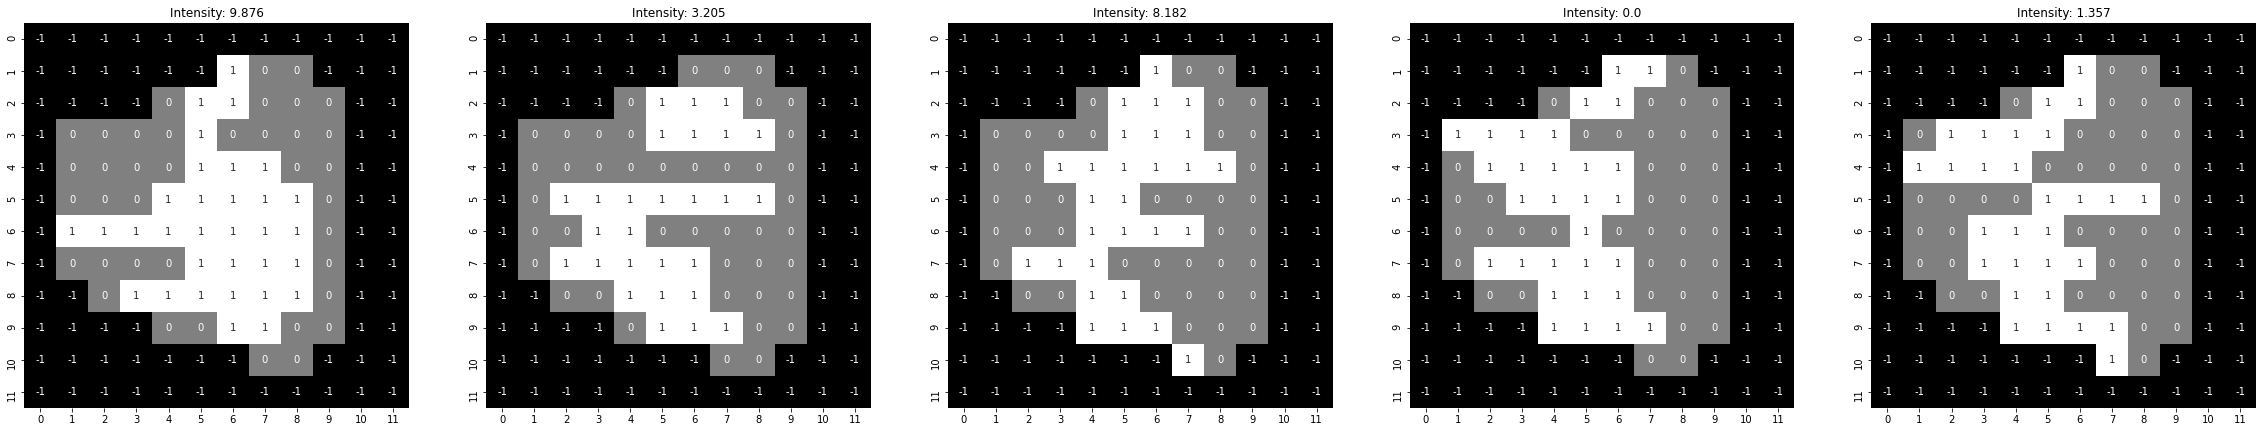

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

budget = True

while budget:
    print("AVAILABLES FILES:")
    for index, files in enumerate_files:
        print("{} - {}".format(index,files))
    
    try:
        option = int(input("File Option"))
    except ValueError:
        print("ERROR Option")
        continue

    if option == 0:
        budget=False
        break
    else:
        
        file_option = enumerate_files[option-1]
        dir_file = dir_exp + file_option[1]
        instance_content = get_instance(dir_file)
        
        fig_intensity, ax_intensity = plt.subplots(1,1, figsize=(10,10))
        
        fig, ax =plt.subplots(1,5, figsize=(40,40))

        colors = sns.color_palette("gray", as_cmap=True)
        sns.heatmap(instance_content['Intensity'], center=0, cmap=colors, \
                    annot=True, fmt='.0f', ax=ax_intensity, cbar=False, square=True)
        ax_intensity.set_title('Beam: {}'.format(instance_content['Beam']))        
        
        sns.heatmap(instance_content['Apertures'][0], center=0, cmap=colors, \
                    annot=True, fmt='.0f', ax=ax[0], cbar=False, square=True)
        ax[0].set_title('Intensity: {}'.format(instance_content['Intensities'][0]))

        sns.heatmap(instance_content['Apertures'][1], center=0, cmap=colors,\
                    annot=True, fmt='.0f', ax=ax[1], cbar=False, square=True)
        ax[1].set_title('Intensity: {}'.format(instance_content['Intensities'][1]))

        sns.heatmap(instance_content['Apertures'][2], center=0, cmap=colors,\
                    annot=True, fmt='.0f', ax=ax[2], cbar=False, square=True)
        ax[2].set_title('Intensity: {}'.format(instance_content['Intensities'][2]))

        sns.heatmap(instance_content['Apertures'][3], center=0, cmap=colors, \
                    annot=True, fmt='.0f', ax=ax[3], cbar=False, square=True)
        ax[3].set_title('Intensity: {}'.format(instance_content['Intensities'][3]))

        sns.heatmap(instance_content['Apertures'][4], center=0, cmap=colors, \
            annot=True, fmt='.0f', ax=ax[4], cbar=False, square=True)
        ax[4].set_title('Intensity: {}'.format(instance_content['Intensities'][4]))
        
        plt.show()